# **Contents** <br>
## 1. Import Libraries 
## 2. Load Data
## 3. Data Cleaning
## 4. Historical Price Visualization
### $\;\;\;\;\;\;$ 4.1 Data Preparation
### $\;\;\;\;\;\;$ 4.2 Daily Historical Price Chart Since Existence of the Coin
###  $\;\;\;\;\;\;$ 4.3 Daily ROI Chart
## 5. Price Correlation
## 6. Forecasting Price with ARIMA for LINK
### $\;\;\;\;\;\;$ 6.1 Prepare Data
### $\;\;\;\;\;\;$ 6.2 Check for Stationarity of the Data
### $\;\;\;\;\;\;$ 6.3 Pre-processing: Transformation and Differencing
### $\;\;\;\;\;\;$ 6.4 Autocorrelation
### $\;\;\;\;\;\;$ 6.5 ARIMA Model 
### $\;\;\;\;\;\;$ 6.6 Predictions
### $\;\;\;\;\;\;$ 6.7 Evaluation
## 7. Observations
## 8. References

# 1. Import Libraries 


In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import datetime
from functools import reduce
from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.filterwarnings("ignore")


# 2. Load Data

In [2]:
btc=pd.read_csv(r"C:\...\P2 - Crpyto correlation\btc.csv")
eth=pd.read_csv(r"C:\...\P2 - Crpyto correlation\eth.csv")
xmr=pd.read_csv(r"C:\...\P2 - Crpyto correlation\xmr.csv")
bnb=pd.read_csv(r"C:\...\P2 - Crpyto correlation\bnb.csv")
doge=pd.read_csv(r"C:\...\P2 - Crpyto correlation\doge.csv")
link=pd.read_csv(r"C:\...\P2 - Crpyto correlation\link.csv")


In [3]:
crypto={}
crypto=[btc,eth,xmr,bnb,doge,link]

In [4]:
crypto[0].head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


# 3. Data Cleaning

In [5]:
#adding new column for daily ROI
for i in range (0,6):
    crypto[i]['price_change']=crypto[i]['price']
    crypto[i]['price_change'][0]=0
    for q in range (1,len(crypto[i]['price'])):
        crypto[i]['price_change'][q]=(((crypto[i]['price'][q])-(crypto[i]['price'][q-1]))/(crypto[i]['price'][q-1]))*100;

In [6]:
crypto[0].head()

,snapped_at,price,market_cap,total_volume,price_change
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0,0.000000
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0,4.922395
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0,-4.691462
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0,-13.525499
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0,-11.598291


In [7]:
#renaming price column
crypto[0]['btc_price']=crypto[0]['price']
crypto[1]['eth_price']=crypto[1]['price']
crypto[2]['xmr_price']=crypto[2]['price']
crypto[3]['bnb_price']=crypto[3]['price']
crypto[4]['doge_price']=crypto[4]['price']
crypto[5]['link_price']=crypto[5]['price']

In [8]:
#renaming price change column
crypto[0]['btc_price_change']=crypto[0]['price_change']
crypto[1]['eth_price_change']=crypto[1]['price_change']
crypto[2]['xmr_price_change']=crypto[2]['price_change']
crypto[3]['bnb_price_change']=crypto[3]['price_change']
crypto[4]['doge_price_change']=crypto[4]['price_change']
crypto[5]['link_price_change']=crypto[5]['price_change']

In [9]:
for i in range(0,6):
    crypto[i]['date'] = crypto[i]['snapped_at'].str.split(' ').str[0]

In [10]:
for i in range(0,6):
    print (crypto[i].columns, crypto[i].shape);



Index(['snapped_at', 'price', 'market_cap', 'total_volume', 'price_change',
       'btc_price', 'btc_price_change', 'date'],
      dtype='object') (3020, 8)
Index(['snapped_at', 'price', 'market_cap', 'total_volume', 'price_change',
       'eth_price', 'eth_price_change', 'date'],
      dtype='object') (2190, 8)
Index(['snapped_at', 'price', 'market_cap', 'total_volume', 'price_change',
       'xmr_price', 'xmr_price_change', 'date'],
      dtype='object') (2632, 8)
Index(['snapped_at', 'price', 'market_cap', 'total_volume', 'price_change',
       'bnb_price', 'bnb_price_change', 'date'],
      dtype='object') (1418, 8)
Index(['snapped_at', 'price', 'market_cap', 'total_volume', 'price_change',
       'doge_price', 'doge_price_change', 'date'],
      dtype='object') (2788, 8)
Index(['snapped_at', 'price', 'market_cap', 'total_volume', 'price_change',
       'link_price', 'link_price_change', 'date'],
      dtype='object') (1366, 8)


In [11]:
for i in range(0,6):
    crypto[i]=crypto[i].drop(['snapped_at','price','market_cap', 'total_volume','price_change'],axis=1)

In [12]:
crypto[0].head()

,btc_price,btc_price_change,date
0,135.30,0.000000,2013-04-28
1,141.96,4.922395,2013-04-29
2,135.30,-4.691462,2013-04-30
3,117.00,-13.525499,2013-05-01
4,103.43,-11.598291,2013-05-02


In [13]:
for i in crypto:
    print (i.columns)

Index(['btc_price', 'btc_price_change', 'date'], dtype='object')
Index(['eth_price', 'eth_price_change', 'date'], dtype='object')
Index(['xmr_price', 'xmr_price_change', 'date'], dtype='object')
Index(['bnb_price', 'bnb_price_change', 'date'], dtype='object')
Index(['doge_price', 'doge_price_change', 'date'], dtype='object')
Index(['link_price', 'link_price_change', 'date'], dtype='object')


In [14]:
for i in range(0,5):
    print (crypto[i].isna().sum())

btc_price           0
btc_price_change    0
date                0
dtype: int64
eth_price           0
eth_price_change    0
date                0
dtype: int64
xmr_price           0
xmr_price_change    0
date                0
dtype: int64
bnb_price           0
bnb_price_change    0
date                0
dtype: int64
doge_price           0
doge_price_change    0
date                 0
dtype: int64


### Observations
- The number days of exsistence (or since coin gecko collected historical information) can be see from the shape of data. With BTC having the longest and DOGE being the recent
- we can see that 'snapped_at' which is the date is not in date format
- there are no missing values

# 4. Historical Price Visualization

## 4.1 Data Preparation

In [15]:
#Merge Data to one DataFrame
df = reduce(lambda  left,right: pd.merge(left,right,on=['date'],how='outer'), crypto).fillna('0')

In [16]:
df.head()

,btc_price,btc_price_change,date,eth_price,eth_price_change,xmr_price,xmr_price_change,bnb_price,bnb_price_change,doge_price,doge_price_change,link_price,link_price_change
0,135.30,0.000000,2013-04-28,0,0,0,0,0,0,0,0,0,0
1,141.96,4.922395,2013-04-29,0,0,0,0,0,0,0,0,0,0
2,135.30,-4.691462,2013-04-30,0,0,0,0,0,0,0,0,0,0
3,117.00,-13.525499,2013-05-01,0,0,0,0,0,0,0,0,0,0
4,103.43,-11.598291,2013-05-02,0,0,0,0,0,0,0,0,0,0


In [17]:
df.dtypes

btc_price            float64
btc_price_change     float64
date                  object
eth_price             object
eth_price_change      object
xmr_price             object
xmr_price_change      object
bnb_price             object
bnb_price_change      object
doge_price            object
doge_price_change     object
link_price            object
link_price_change     object
dtype: object

In [18]:
df.columns

Index(['btc_price', 'btc_price_change', 'date', 'eth_price',
       'eth_price_change', 'xmr_price', 'xmr_price_change', 'bnb_price',
       'bnb_price_change', 'doge_price', 'doge_price_change', 'link_price',
       'link_price_change'],
      dtype='object')

In [19]:
#change data type to numeric
columns=['btc_price', 'btc_price_change', 'eth_price', 'eth_price_change',
       'xmr_price', 'xmr_price_change', 'bnb_price', 'bnb_price_change',
       'doge_price', 'doge_price_change', 'link_price', 'link_price_change']
for i in range (0,len(columns)):
    df[columns[i]]=pd.to_numeric(df[columns[i]]);


In [20]:
df.dtypes

btc_price            float64
btc_price_change     float64
date                  object
eth_price            float64
eth_price_change     float64
xmr_price            float64
xmr_price_change     float64
bnb_price            float64
bnb_price_change     float64
doge_price           float64
doge_price_change    float64
link_price           float64
link_price_change    float64
dtype: object

## 4.2 Daily Historical Price Chart Since Existence of the Coin

In [27]:
col1=['btc_price','eth_price','xmr_price', 'bnb_price', 'doge_price', 'link_price']
fig = px.line(df, x='date', y=col1,hover_data={"date": "|%B %d, %Y"},title='Historical Price Comparison',labels={'date':"Date", 'variable' :"Coin" , 'value' :"Price ($)"})
fig.update_xaxes(
    #tickformat="%b\n%Y",
    ticklabelmode="period",
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
fig.show()

## 4.3 Daily ROI Chart


In [28]:
col2=['btc_price_change', 'eth_price_change', 'xmr_price_change', 'bnb_price_change',
        'doge_price_change', 'link_price_change']
fig = px.line(df, x='date', y=col2,hover_data={"date": "|%B %d, %Y"},title='Volatility Index (Daily Price Change %)',labels={'date':"Date", 'variable' :"Coin" , 'value' :"Price Change Percentage"})
fig.update_xaxes(
    #tickformat="%b\n%Y",
    ticklabelmode="period",
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1M", step="month", stepmode="backward"),
            dict(count=6, label="6M", step="month", stepmode="backward"),
            dict(count=1, label="1Y", step="year", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(step="all")
        ])
    )
)
fig.show()

The plots are interactive with an option to filter out by both coin and the timeframe. We can zoom into the data to further examine the data.

In [57]:
#deployment to a weblink
# import chart_studio
# chart_studio.tools.set_credentials_file(username='...', api_key='...')



In [58]:
#push for deployment to plotly charts
# import chart_studio.plotly as py
# py.plot(fig, filename = 'gdp_per_cap', auto_open=True)

# 5. Price Correlation

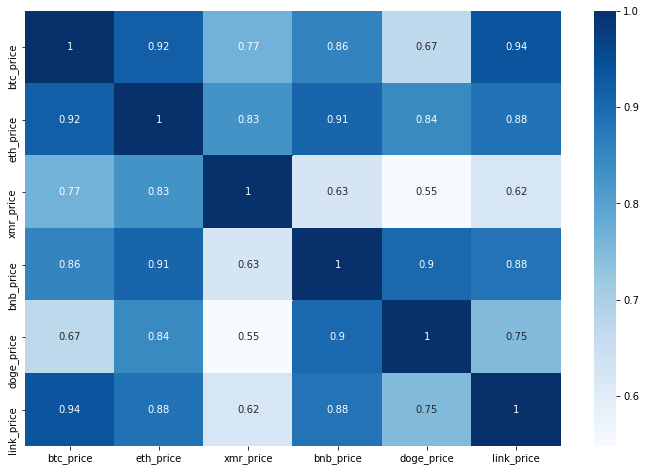

In [192]:
#price correlation
plt.figure(figsize=(12,8))
sns.heatmap(df[col1].corr(),cmap='Blues',annot=True)

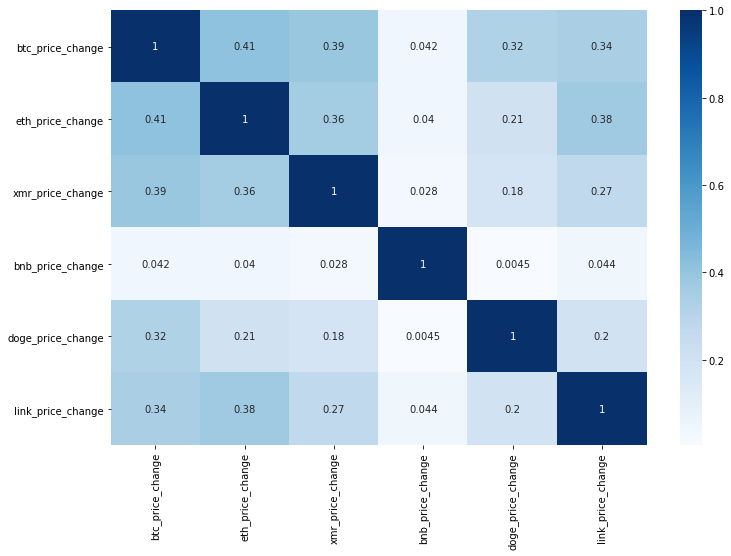

In [193]:
#price change correlation
plt.figure(figsize=(12,8))
sns.heatmap(df[col2].corr(),cmap='Blues',annot=True)

All coins have a very high correlation to Bitcoin and between each other. Chainlink and Eth has a surprisingly high correaltion. We could further do significant testing.
We could vizualize the correaltion using a pairplot.
<br>
The Price change however doesn't have a very high correaltion. 


In [30]:
#sns.pairplot(df[col1])

# 6. Forecasting Price with ARIMA for LINK

Read the End Notes to understand the limitation of ARIMA for effective forecast.

## 6.1 Prepare Data

In [195]:
#filter LINK data to new dataframe
df_link=df[['date','link_price']]
df_link.head(),df_link.shape

(         date  link_price
 0  2013-04-28         0.0
 1  2013-04-29         0.0
 2  2013-04-30         0.0
 3  2013-05-01         0.0
 4  2013-05-02         0.0,
 (3020, 2))

In [196]:
#change starting date of available historical data for LINK from 09 November 2017
df_link['date'] = pd.to_datetime(df_link['date'], errors='coerce')
df_link = df_link.loc[(df_link['date'] >= '2017-11-09')]

#set index to date
df_link.set_index('date',inplace=True)
df_link.head(),df_link.shape

(            link_price
 date                  
 2017-11-09    0.225377
 2017-11-10    0.189036
 2017-11-11    0.181223
 2017-11-12    0.170013
 2017-11-13    0.180691,
 (1366, 1))

## 6.2 Check for Stationarity of the Data

In [197]:
#function to check Stationarity with Adfuller test

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(price):
    result=adfuller(price)
    labels = ['ADF Test Statistic','p-value','Lags Used','Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("Accept the NULL hypothesis, time series has a unit root, indicating it is non-stationary ")

In [198]:
adfuller_test(df_link['link_price'])

ADF Test Statistic : -0.8522740425315506
p-value : 0.8032829150687171
Lags Used : 23
Observations Used : 1342
Accept the NULL hypothesis, time series has a unit root, indicating it is non-stationary 


## 6.3 Pre-processing: Transformation and Differencing


In order to perform a time series analysis, we may need make the data stationary. 
<br>
If both mean and standard deviation are flat lines(constant mean and constant variance), the series becomes stationary.
<br>
Non-stationary implies the lack of broad trends (changes in mean and variance over time) in the data.

In [199]:
#make a dataframe with Monthly historical data for Monthly Forecast
link_month=df_link.resample('M').mean()
link_month.shape

(46, 1)

<Figure size 432x288 with 0 Axes>

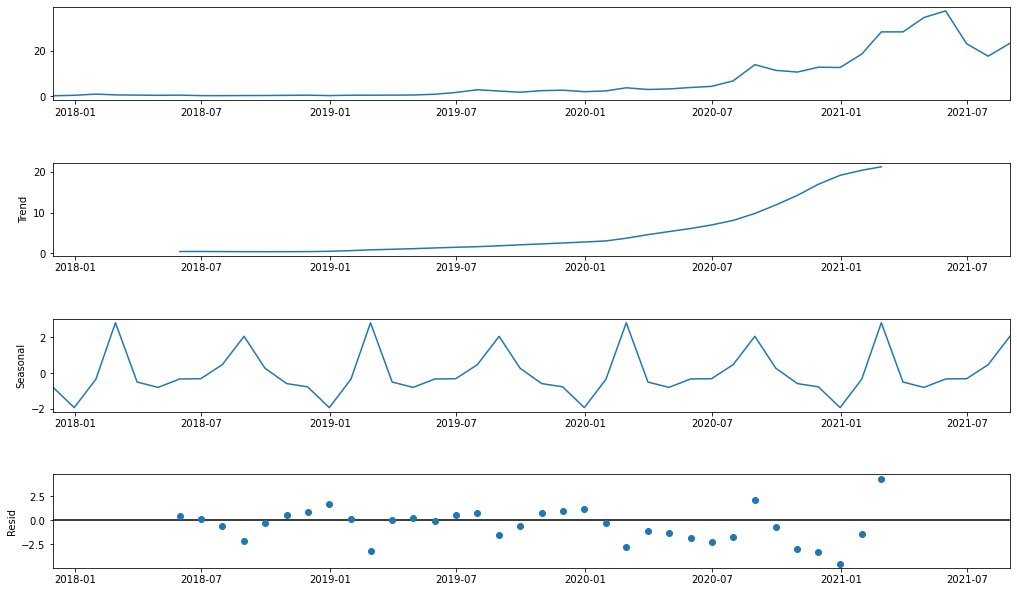

In [200]:
result = seasonal_decompose(link_month, model='additive')
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)


Observations: There is an upward trend and a clear seasonality seperated by year. The residuals were fairly constant until mid 2020 and since then is very volatile. The reduces the quality of the forecast. 
<br>
<br>
We'll now transform data using different methods to suppress the variance and make it stationary. We'll try predicting with different transformations.

In [201]:
#change the data accordning to the seasonality we noticed  
#link_month = link_month.asfreq('Y')

In [202]:
adfuller_test(link_month)

ADF Test Statistic : -1.5135949941560907
p-value : 0.526775690878421
Lags Used : 9
Observations Used : 36
Accept the NULL hypothesis, time series has a unit root, indicating it is non-stationary 


In [203]:
#box-cox (power) transformation to suppress some variance; can also try sqrt tranformation or log transformation
link_month['link_price_box'], lmbda = stats.boxcox(link_month.link_price)
adfuller_test(link_month['link_price_box'])

ADF Test Statistic : -1.0331372151527325
p-value : 0.7409872589607064
Lags Used : 0
Observations Used : 45
Accept the NULL hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing the data to make it stationary; accounting for trends by differencing allows us to use the models that account for oscillations. Seasonal differntiation is computing the difference between an observation and the corresponding observation in the previous year.

In [204]:
#Seasonal differentiation (12 months)
link_month['link_price_12'] = link_month.link_price_box - link_month.link_price_box.shift(12)
adfuller_test(link_month['link_price_12'][12:])

ADF Test Statistic : -1.5997022193025583
p-value : 0.4837430538200539
Lags Used : 0
Observations Used : 33
Accept the NULL hypothesis, time series has a unit root, indicating it is non-stationary 


In [205]:
# Seasonal differentiation (3 months)
link_month['link_price_3'] = link_month.link_price_box - link_month.link_price_box.shift(3)
adfuller_test(link_month['link_price_3'][3:])

ADF Test Statistic : -3.1062442065628386
p-value : 0.026094527058268122
Lags Used : 8
Observations Used : 34
Reject the null hypothesis. Data has no unit root and is stationary


In [206]:
#second order differencing of 12 months data
link_month['link_price_diff_12'] = link_month.link_price_12 - link_month.link_price_12.shift()
adfuller_test(link_month['link_price_diff_12'][13:])

ADF Test Statistic : -4.8880138094124925
p-value : 3.679708987156256e-05
Lags Used : 0
Observations Used : 32
Reject the null hypothesis. Data has no unit root and is stationary


We see that the 3 month and second order differntiation makes the data stationary

## 6.4 Autocorrelation

Autocorrelation is the correlation of a time series with the same time series lagged. We create ACF and PCF to identify the AR and MA components in the residuals

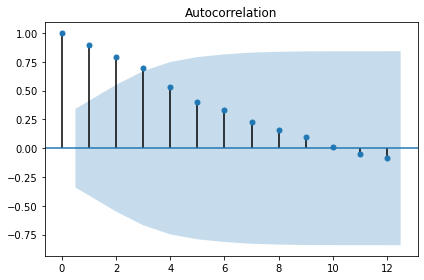

In [207]:
plot_acf(link_month.link_price[13:].values.squeeze(), lags=12)
plt.tight_layout()

There is a positive correlation with the first 10 lags and a significant one for the first 3-4 lags.
A good starting point for the AR parameter of the model may be 4.

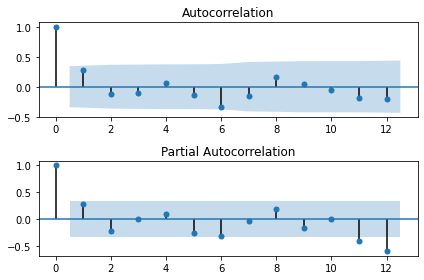

In [208]:

# Initial approximation of parameters using Autocorrelation and Partial Autocorrelation Plots
ax = plt.subplot(211)
# Plot the autocorrelation function
plot_acf(link_month.link_price_diff_12[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
plot_pacf(link_month.link_price_diff_12[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()

There are not many spikes in the plots outside the insignificant zone (shaded) and there may not be enough information available in the residuals

## 6.5 ARIMA Model 

AutoRegressive Integrated Moving Average (ARIMA). 
<br>
ARIMA has parameters that account for seasonality, trend, and noise in the dataset. The parameters are p, d and q. 
<br>
p : lag order (AR) <br>
d : degree of differentiation (I) <br>
q : Order of moving average (MA) <br>
p,d,q parameters are used to make the data stationary, ie, to remove the trend and seasonal structures that affect the regression (linear) model.

We'll explore by iterations of different parameters. We'll use AOC to assess the quality of the parameters. We're interested in the AIC that is lowest which achieves the same goodness-of-fit as a complec model.

In [209]:
# Approximation of ARIMA parameters 
qs = range(0, 4)
ps = range(0, 4)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(link_month.link_price, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [210]:
# AIC scores of parameter combinations
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())


   parameters         aic
10     (2, 2)  220.465105
14     (3, 2)  221.337877
11     (2, 3)  221.685544
15     (3, 3)  223.315637
7      (1, 3)  229.694402


In [211]:
print(best_model.summary())

                               SARIMAX Results                                
Dep. Variable:             link_price   No. Observations:                   46
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -105.233
Date:                Thu, 12 Aug 2021   AIC                            220.465
Time:                        00:06:48   BIC                            229.498
Sample:                    11-30-2017   HQIC                           223.833
                         - 08-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9581      0.097     -9.866      0.000      -1.148      -0.768
ar.L2         -0.7311      0.103     -7.083      0.000      -0.933      -0.529
ma.L1          1.6655     19.628      0.085      0.9

In [212]:
adfuller_test(best_model.resid[3:])

ADF Test Statistic : -0.8415550185475228
p-value : 0.8066099068845962
Lags Used : 10
Observations Used : 32
Accept the NULL hypothesis, time series has a unit root, indicating it is non-stationary 


Disclaimer/ Observation: The best model we used is still not stationary as we used the orginal monthly data and not the pre-processed ones. <br>
The pre-processed data is supposed to be used to build the model and do the prediction. However, they doesn't capure the seasonality well enough to give a forecast better than a straight line or a squigly line. We'll go ahead with the diagnostics and prediction anyway..
 

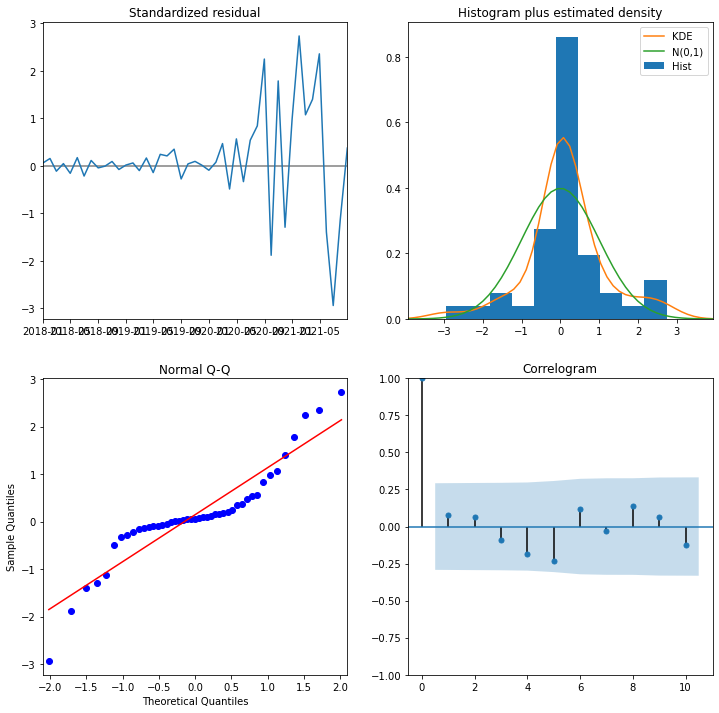

In [217]:
best_model.plot_diagnostics(figsize=(12, 12))
plt.show()

## 6.6 Predictions 

In [ ]:
# Function Inverse Box-Cox Transformation
# Here we ended up using the actual data and hence this is not this is not required
'''
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))
'''

In [ ]:
# Undo Seasonal differentiation (3 months)
#pred = pred + pred.shift(-3)
#pred = invboxcox(pred,lmbda)

In [215]:
link_month.head(15)

,link_price,link_price_box,link_price_12,link_price_3,link_price_diff_12
date,,,,,
2017-11-30,0.176532,-1.882849,NaN,NaN,NaN
2017-12-31,0.384598,-0.999563,NaN,NaN,NaN
2018-01-31,0.927156,-0.075901,NaN,NaN,NaN
2018-02-28,0.566694,-0.583293,NaN,1.299556,NaN
2018-03-31,0.466262,-0.790896,NaN,0.208667,NaN
2018-04-30,0.393397,-0.974854,NaN,-0.898953,NaN
2018-05-31,0.463316,-0.797705,NaN,-0.214412,NaN
2018-06-30,0.248355,-1.487714,NaN,-0.696818,NaN
2018-07-31,0.232814,-1.561546,NaN,-0.586692,NaN


In [218]:
#predictions
pred=best_model.predict(start=datetime(2017, 11, 30), end=datetime(2022, 3, 31),typ='levels',exog=None, dynamic=False).rename('ARIMA test predictions')
print(pred)

2017-11-30     0.000000
2017-12-31     0.176532
2018-01-31     0.403847
2018-02-28     0.920485
2018-03-31     0.329851
2018-04-30     0.819087
2018-05-31     0.007702
2018-06-30     0.808181
2018-07-31    -0.063548
2018-08-31     0.398422
2018-09-30     0.315128
2018-10-31     0.135561
2018-11-30     0.639505
2018-12-31     0.223913
2019-01-31     0.279005
2019-02-28     0.679158
2019-03-31     0.057184
2019-04-30     0.858567
2019-05-31     0.258484
2019-06-30     1.118116
2019-07-31     1.984642
2019-08-31     2.941217
2019-09-30     1.643551
2019-10-31     2.213812
2019-11-30     2.616193
2019-12-31     2.207774
2020-01-31     2.145183
2020-02-29     2.578627
2020-03-31     4.130061
2020-04-30     1.838955
2020-05-31     4.621435
2020-06-30     3.041323
2020-07-31     4.741101
2020-08-31     8.546869
2020-09-30    15.913047
2020-10-31     6.375305
2020-11-30    15.892919
2020-12-31    10.328769
2021-01-31    12.091311
2021-02-28    25.838607
2021-03-31    25.055666
2021-04-30    29

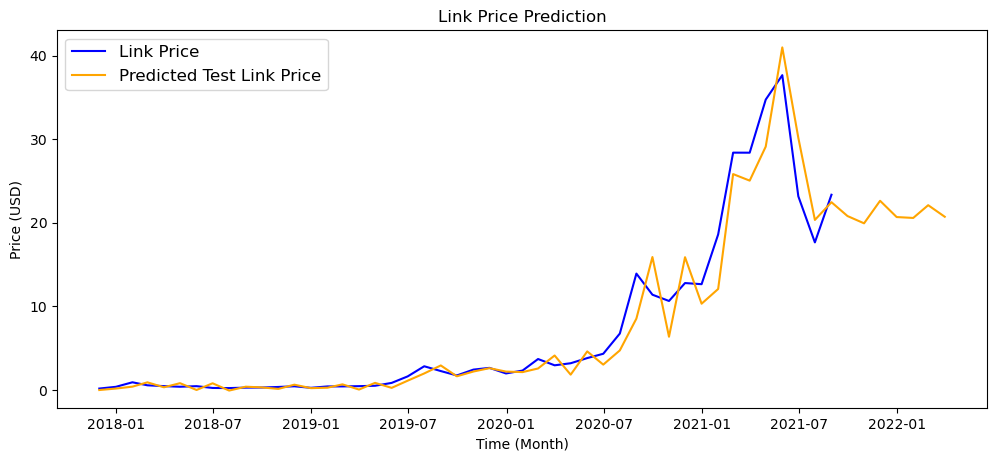

In [219]:
#Plot prediction and Orginal Data
plt.figure(figsize=(12,5), dpi=100)
plt.plot(link_month['link_price'],color = 'blue', label='Link Price')
plt.plot(pred, color = 'orange',label='Predicted Test Link Price')
plt.title('Link Price Prediction')
plt.xlabel('Time (Month)')
plt.ylabel('Price (USD)')
plt.legend(loc='upper left', fontsize=12)
plt.show()

## 6.7 Evaluation 

In [220]:
link_month['link_price'].mean()

7.0528790051998405

In [223]:
rmse=sqrt(mean_squared_error(pred[:46],link_month['link_price']))
print(rmse)

2.3650814911416207


We found the RMSE without considering train test split. The model's RMSE is big compared to the mean and this points to drastic improvement to the model.

# 7. Observations 

The model we used is still not stationary as we used the orginal monthly data and not the pre-processed ones. <br>
The pre-processed data is supposed to be used to build the model and do the prediction. However, they weren't capuring the seasonality well enough to give a forecast better than a straight line or a squiggly line. 
<br><br>
The model can't be used to make investment decisions, esp because it is used to predict long periods of time.  
<br>
Potential Improvements <br>
1. The model can be made better with incorporating the seasonal trends with the help of a domain expert. Due to the high volatility of crypto currencies the seasonality however maybe difficult to determine and could make ARIMA not a great model for crypto forecast. 
2. The model can be made better with use of standardization and differentiation techniques
3. Avoiding periods of high volatility
4. Using models other than ARIMA 

# 8. References

1. Introduction to Time Series Forecasting by Jason Brownlee (Machine Learning Mastery) <br>
2. https://github.com/nachi-hebbar/ARIMA-Temperature_Forecasting
3. https://www.kaggle.com/taniaj/cryptocurrency-price-forecasting/
4. https://github.com/krishnaik06/ARIMA-And-Seasonal-ARIMA
5. https://www.kdnuggets.com/2020/01/stock-market-forecasting-time-series-analysis.html
6. https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/